# MEMBERSIHKAN DATA

In [1]:
# Import Library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Download Dataset
url='https://raw.githubusercontent.com/Ayuradha/Used-Car/master/used_car_data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
# Mengecek nilai null
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
# Mengganti satuan agar data lebih bersih dan tersisa yang numerik saja
df['Engine']=df['Engine'].str.replace('CC','')
df['Mileage']=df['Mileage'].str.replace('kmpl','')
df['Mileage']=df['Mileage'].str.replace('km/kg','')
df['Power']=df['Power'].str.replace('bhp','')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [8]:
df['Mileage'] = pd.to_numeric(df['Mileage'],errors='coerce')
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'],errors='coerce')

In [9]:
# Mengganti nilai null dengan median
df['Mileage'].fillna((df['Mileage'].median()), inplace=True)
df['Engine'].fillna((df['Engine'].median()), inplace=True)
df['Power'].fillna((df['Power'].median()), inplace=True)
df['Seats'].fillna((df['Seats'].median()), inplace=True)

In [10]:
# Mengecek kemabil nilai null
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
# Memecah Name menjadi Seri dan Brand
df['Brand'] = df['Name'].str.split(' ').str[0]
df['Series'] = df['Name'].str.split(' ').str[1]

In [12]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Series
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon


#MARI KITA EXPLORE

In [13]:
# Mengetahui beberapa jumlah merek mobil
brand = df['Brand'].unique()
df.Brand[df.Brand == 'ISUZU'] = 'Isuzu'
print("Jumlah Merek Mobil: {}".format(len(brand)))
for i in brand:
  print(i)

Jumlah Merek Mobil: 31
Maruti
Hyundai
Honda
Audi
Nissan
Toyota
Volkswagen
Tata
Land
Mitsubishi
Renault
Mercedes-Benz
BMW
Mahindra
Ford
Porsche
Datsun
Jaguar
Volvo
Chevrolet
Skoda
Mini
Fiat
Jeep
Smart
Ambassador
Isuzu
ISUZU
Force
Bentley
Lamborghini


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Mencari tahu apakah satu seri memiliki beberapa versi juga?
df[df.Brand == 'Honda']['Series'].unique()

array(['Jazz', 'City', 'Amaze', 'WRV', 'Brio', 'Civic', 'CR-V', 'Accord',
       'BRV', 'BR-V', 'Mobilio', 'WR-V'], dtype=object)

In [15]:
mereks = []
series_mobil = []
for i in brand:
  jumlah_seri = len(df[df.Brand == i]['Series'].unique())
  mereks.append(i)
  series_mobil.append(jumlah_seri)
  print('Merek {}, Jumlah Seri: {}'.format(i,jumlah_seri))

Merek Maruti, Jumlah Seri: 24
Merek Hyundai, Jumlah Seri: 15
Merek Honda, Jumlah Seri: 12
Merek Audi, Jumlah Seri: 10
Merek Nissan, Jumlah Seri: 6
Merek Toyota, Jumlah Seri: 8
Merek Volkswagen, Jumlah Seri: 8
Merek Tata, Jumlah Seri: 15
Merek Land, Jumlah Seri: 1
Merek Mitsubishi, Jumlah Seri: 5
Merek Renault, Jumlah Seri: 8
Merek Mercedes-Benz, Jumlah Seri: 19
Merek BMW, Jumlah Seri: 10
Merek Mahindra, Jumlah Seri: 16
Merek Ford, Jumlah Seri: 11
Merek Porsche, Jumlah Seri: 4
Merek Datsun, Jumlah Seri: 3
Merek Jaguar, Jumlah Seri: 4
Merek Volvo, Jumlah Seri: 5
Merek Chevrolet, Jumlah Seri: 9
Merek Skoda, Jumlah Seri: 6
Merek Mini, Jumlah Seri: 3
Merek Fiat, Jumlah Seri: 6
Merek Jeep, Jumlah Seri: 1
Merek Smart, Jumlah Seri: 1
Merek Ambassador, Jumlah Seri: 1
Merek Isuzu, Jumlah Seri: 2
Merek ISUZU, Jumlah Seri: 0
Merek Force, Jumlah Seri: 1
Merek Bentley, Jumlah Seri: 1
Merek Lamborghini, Jumlah Seri: 1


<BarContainer object of 31 artists>

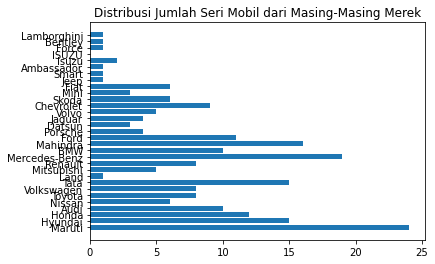

In [16]:
plt.title("Distribusi Jumlah Seri Mobil dari Masing-Masing Merek")
plt.barh(mereks,series_mobil)

Text(0.5, 0.98, 'Categorical Plotting')

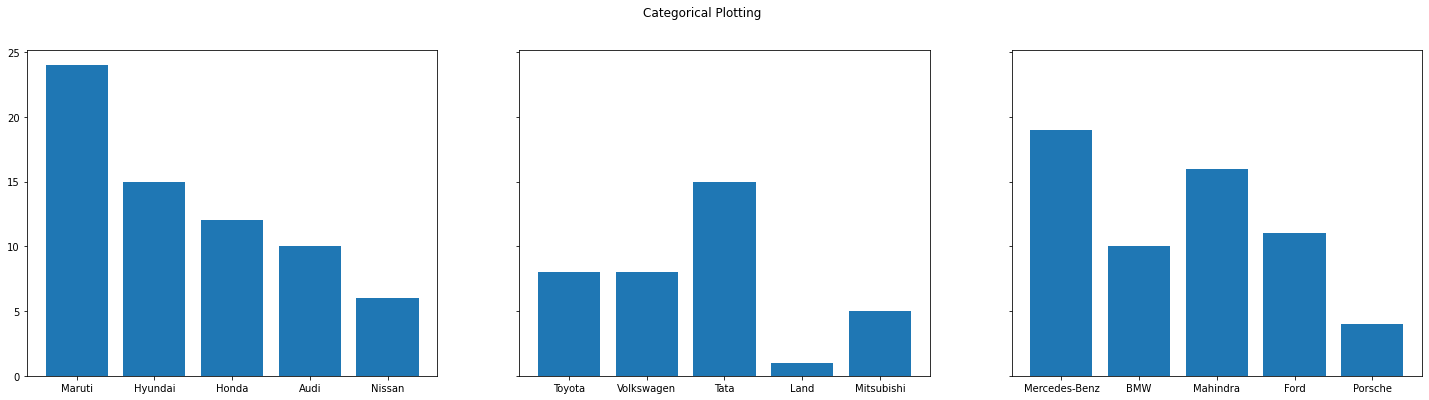

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), sharey=True)
axs[0].bar(mereks[:5], series_mobil[:5])
axs[1].bar(mereks[5:10], series_mobil[5:10])
axs[2].bar(mereks[11:16], series_mobil[11:16])
fig.suptitle('Categorical Plotting')

In [18]:
# TOP 5 Brands
top_brands = ['Maruti','Mercedes-Benz','Hyundai','Tata','Honda']
top_mereks = []
top_series_mobil = []
for i in top_brands:
  jumlah_seri = len(df[df.Brand == i]['Series'].unique())
  top_mereks.append(i)
  top_series_mobil.append(jumlah_seri)
  print('Merek {}, Jumlah Seri: {}'.format(i,jumlah_seri))

Merek Maruti, Jumlah Seri: 24
Merek Mercedes-Benz, Jumlah Seri: 19
Merek Hyundai, Jumlah Seri: 15
Merek Tata, Jumlah Seri: 15
Merek Honda, Jumlah Seri: 12


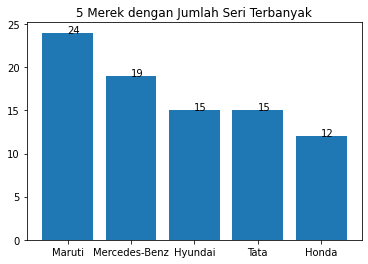

In [19]:
# fig, axs = plt.plot()
plt.bar(top_mereks,top_series_mobil)
plt.title('5 Merek dengan Jumlah Seri Terbanyak')
index = 0
for i in top_series_mobil:
  plt.text(index,i,i)
  index+=1

In [20]:
df[df['Brand']=='Lamborghini']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Series
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,120.0,Lamborghini,Gallardo


# PEMODELAN NN

In [96]:
dataset = df.iloc[:,1:]

In [97]:
dataset = dataset.drop("Price",axis=1)

In [98]:
dataset["Seri"] = dataset['Series']
dataset = dataset.drop('Series',axis=1)

In [99]:
dataset

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Seri
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,Maruti,Swift
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,Hyundai,Xcent
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,Mahindra,Xylo
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,Maruti,Wagon


In [100]:
location = pd.get_dummies(dataset['Location'])
fuel_type = pd.get_dummies(dataset['Fuel_Type'])
transmission = pd.get_dummies(dataset['Transmission'])
owner_type = pd.get_dummies(dataset['Owner_Type'])

In [101]:
dataset

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Seri
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,Maruti,Swift
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,Hyundai,Xcent
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,Mahindra,Xylo
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,Maruti,Wagon


In [102]:
dataset = dataset.drop('Location',axis=1)
dataset = dataset.drop('Fuel_Type',axis=1)
dataset = dataset.drop('Transmission',axis=1)
dataset = dataset.drop('Owner_Type',axis=1)
dataset = dataset.join(location)
dataset = dataset.join(fuel_type)
dataset = dataset.join(transmission)
dataset = dataset.join(owner_type)

In [103]:
dataset

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Seri,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,Maruti,Wagon,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,Hyundai,Creta,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,Honda,Jazz,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,Maruti,Ertiga,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,Audi,A4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,Maruti,Swift,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,Hyundai,Xcent,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,Mahindra,Xylo,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,Maruti,Wagon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0


In [104]:
series = pd.get_dummies(dataset['Seri'])
brand = pd.get_dummies(dataset['Brand'])

In [106]:
dataset.join(series)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Seri,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third,1,1000,3,5,6,7,800,A,A-Star,A3,...,Tavera,Teana,Terrano,Thar,Tiago,Tigor,Tiguan,Tucson,V40,Vento,Venture,Verito,Verna,Versa,Vitara,WR-V,WRV,Wagon,X-Trail,X1,X3,X5,X6,XC60,XC90,XE,XF,XJ,XUV300,XUV500,Xcent,Xenon,Xylo,Yeti,Z4,Zen,Zest,i10,i20,redi-GO
0,2010,72000,26.60,998.0,58.16,5.0,Maruti,Wagon,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,Hyundai,Creta,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,Honda,Jazz,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,Maruti,Ertiga,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,Audi,A4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,Maruti,Swift,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,Hyundai,Xcent,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,Mahindra,Xylo,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,Maruti,Wagon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
dataset = dataset.drop('Seri',axis=1)

In [108]:
dataset

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,Maruti,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,Hyundai,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,Honda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,Maruti,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,Audi,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,Maruti,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,Hyundai,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,Mahindra,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,Maruti,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0


In [109]:
# SPLIT DATA FEATURE AND TARGET
x=dataset.iloc[:,:].values
y=df["Price"].values
# ENCODER LABEL & ONE HOT
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,6] = le.fit_transform(x[:,6])

In [111]:
x.shape

(6019, 29)

In [112]:
# MODELLING
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# DATA SPLIT FOR MODELLING
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1234)

In [114]:
X_train[0]

array([10, 77325, 15.6, 1586.0, 104.68, 5.0, 17, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=object)

In [129]:
from sklearn.preprocessing import MinMaxScaler

mmScaler = MinMaxScaler()
X_train = mmScaler.fit_transform(X_train)
X_test = mmScaler.fit_transform(X_test)

In [116]:
X_train.shape

(3009, 29)

In [138]:
model = keras.Sequential([
keras.layers.Dense(50, activation=tf.nn.relu, input_shape=[29]),
keras.layers.Dense(20, activation=tf.nn.relu),
keras.layers.Dense(10, activation=tf.nn.relu),
keras.layers.Dropout(0.2),
keras.layers.Dense(1, activation=tf.nn.relu)
])
model.compile(optimizer='adam',loss='mean_absolute_error')

In [139]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 50)                1500      
_________________________________________________________________
dense_18 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 2,741
Trainable params: 2,741
Non-trainable params: 0
_________________________________________________________________


In [140]:
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs = 100,batch_size = 10,shuffle = True)

Epoch 1/100
482/482 [==============================] - 1s 2ms/step - loss: 4.9494 - val_loss: 3.5909
Epoch 2/100
482/482 [==============================] - 1s 2ms/step - loss: 3.6887 - val_loss: 3.0055
Epoch 3/100
482/482 [==============================] - 1s 2ms/step - loss: 3.3163 - val_loss: 2.6170
Epoch 4/100
482/482 [==============================] - 1s 2ms/step - loss: 3.1362 - val_loss: 2.3971
Epoch 5/100
482/482 [==============================] - 1s 2ms/step - loss: 2.9356 - val_loss: 2.3756
Epoch 6/100
482/482 [==============================] - 1s 2ms/step - loss: 2.8648 - val_loss: 2.3354
Epoch 7/100
482/482 [==============================] - 1s 2ms/step - loss: 2.7350 - val_loss: 2.5105
Epoch 8/100
482/482 [==============================] - 1s 2ms/step - loss: 2.6723 - val_loss: 2.2297
Epoch 9/100
482/482 [==============================] - 1s 2ms/step - loss: 2.6369 - val_loss: 2.5081
Epoch 10/100
482/482 [==============================] - 1s 2ms/step - loss: 2.6215 - val_lo

In [141]:
y_pred = model.predict(X_test)

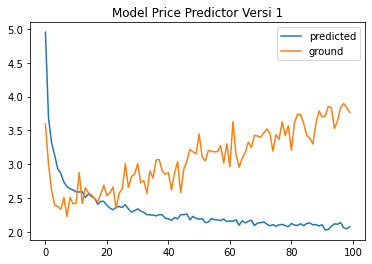

In [143]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.title("Model Price Predictor Versi 1")
plt.plot(loss,label="predicted")
plt.plot(val_loss,label="ground")
# plt.ylim((500,1100))
# plt.xlim((0,60))
plt.legend()

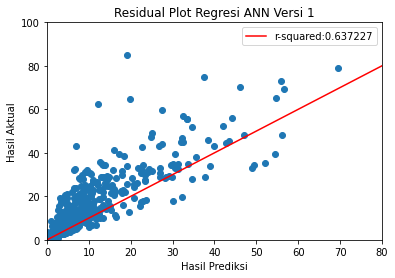

In [147]:
from sklearn.metrics import r2_score
plt.title("Residual Plot Regresi ANN Versi 1")
x_space = np.linspace(0, 4000)
y_space = np.linspace(0, 4000)
plt.plot(x_space,y_space,color='red')
plt.scatter(y_pred,y_test)
plt.xlim((0,80))
plt.ylim((0,100))
plt.xlabel("Hasil Prediksi")
plt.ylabel("Hasil Aktual")
rd = format(r2_score(y_test,y_pred),'2f')
plt.legend(["r-squared:"+str(rd)])